# **Analyzing Factors Using PCA**

Learning goals
- Define principal component analysis.
- Explain which principal components contain the most variability.
- Relate factor loadings, eigenvalues, and eigenvectors.
- Use a scree plot to select the number of factors for a model.
- Implement principal component analysis using scikit-learn.

#### **Factor analysis and PCA**
Factor analysis is a two-step process: factor extraction and factor rotation. ***Factor extraction*** transforms features into uncorrelated factors with corresponding loadings. ***Factor rotation*** rotates the axes to make subsequent analysis easier.

***Principal component analysis***, or ***PCA***, is a factor analysis technique used to find orthogonal components and factor loadings so that each successive component contains the maximum possible variability. The first principal component contains the largest variability, and each successive component contributes less variability than the previous component.

#### **Eigenvalues**
An eigenvalue for a factor gives the variability in all features explained by that factor. This value is computed by finding the sum of the square loadings on the factor across all features. The sum of the eigenvalues is the same as the number of features in the dataset. So the percent variability explained by a factor is given by the following formula:

    percent variability = (eigenvalue)/(number of features)

In the animation below, four factors - F1, F2, F3, F4 - were obtained from four features in the rock dataset: area, perimeter, shape, and permeability. Each principal component does not necessarily represent any one feature, but a combination of the features.

#### **Eigenvectors**
Factors can be expressed as a linear combination of input features. An ***eigenvector*** is a vector formed by the coefficients of the input features. The loadings for a factor given an associated eigenvalue can be found using this formula:

    Loadings = Eigenvector * sqrt(Eigenvalue)


#### **Scree plots**
The main purpose of PCA is to use a smaller set of factors when performing various modeling tasks. In theory, the same number of factors can be used as the number of input features. But some of the factors can be discarded, because of the limited variability those factors represent. A ***scree plot*** is a line plot of eigenvalues used to select which factors should be used in a model. Only the factors to the left of the point at which the plot starts leveling off should be selected.

#### **Factor analysis in Python**
The scikit-learn.decomposition library has two models for factor analysis: PCA and FactorAnalysis. Both models require the parameter n_components, but if this parameter is omitted, the default value for n_components is set to the number of input features. The rest of the parameters and matching values can be found in the PCA documentation 

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

and the FactorAnalysis documentation

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html#sklearn.decomposition.FactorAnalysis


**Common attributes of a factor model.**
components_	- Factors representing the maximum variance

explained_variance_ (PCA only)	- Amount of variance explained by the selected principal components

explained_variance_ratio (PCA only)	- Percentage of variance explained by the selected principal components

The Python code below applies factor analysis to the rock dataset.



In [35]:
# Load the pandas package
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [36]:
# Load the rock.csv dataset
rock = pd.read_csv('/Users/dylanlam/Documents/GitHub/data_science_practice_and_skills/datasets/rock.csv', names = ['x', 'Area', 'Perimeter', 'Shape', 'Permeability'])
rock = rock.drop('x', axis =1).drop(0).reset_index().drop('index', axis = 1)
rock

,Area,Perimeter,Shape,Permeability
0,4990,2791.9,0.0903296,6.3
1,7002,3892.6,0.148622,6.3
2,7558,3930.66,0.183312,6.3
3,7352,3869.32,0.117063,6.3
4,7943,3948.54,0.122417,17.1
5,7979,4010.15,0.167045,17.1
6,9333,4345.75,0.189651,17.1
7,8209,4344.75,0.164127,17.1
8,8393,3682.04,0.203654,119
9,6425,3098.65,0.162394,119


<Axes: >

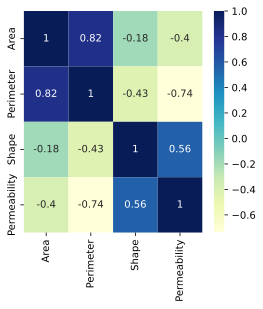

In [37]:
# Display the correlation matrix using a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(rock.corr(), cmap="YlGnBu", annot=True)

In [38]:
# Scale the data
scaler = StandardScaler()
rock = pd.DataFrame(
    scaler.fit_transform(rock), columns=['Area', 'Perimeter', 'Shape', 'Permeability']
)

In [39]:
# Initialize and fit a PCA model on the rock data
pcaModel = PCA(n_components=4)
pcaModel.fit(rock)

PCA(n_components=4)

In [40]:
# Display the components
pcaModel.components_

array([[-0.47442375, -0.58862858,  0.3932268 ,  0.5232697 ],
       [ 0.60461291,  0.23665879,  0.70542154,  0.28428208],
       [-0.37639417,  0.06308377,  0.58863352, -0.71264188],
       [ 0.51739034, -0.77040862, -0.03554881, -0.3708289 ]])

In [41]:
# Display the explained variance (eigenvalues)
pcaModel.explained_variance_

array([2.66447132, 0.94255618, 0.40448323, 0.07359565])

In [42]:
# Show the factor loadings
pcaModel.components_.T * np.sqrt(pcaModel.explained_variance_)

array([[-0.77441178,  0.58699046, -0.23938291,  0.14036034],
       [-0.9608307 ,  0.22976097,  0.04012064, -0.20900045],
       [ 0.6418723 ,  0.68486084,  0.37436501, -0.00964387],
       [ 0.85414403,  0.2759962 , -0.45323308, -0.10060039]])

Text(0, 0.5, 'Eigenvalues')

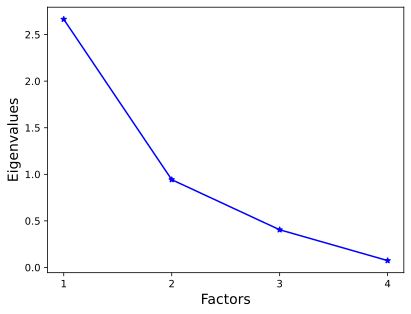

In [43]:
# Create a scree plot
xint = range(0, 5)
plt.xticks(xint)
plt.plot([1, 2, 3, 4], pcaModel.explained_variance_, 'b*-')
plt.xlabel('Factors', fontsize='14')
plt.ylabel('Eigenvalues', fontsize='14')